In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

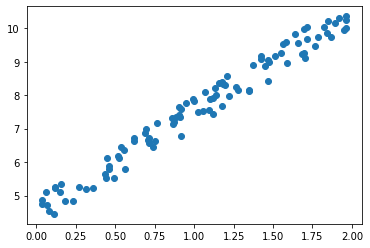

In [5]:
X = 2*np.random.rand(100,1)
y = 4+ 3*X + np.random.rand(100,1)

plt.scatter(X,y)

## Example of the closed form function for Linear Regression:

$$
  \theta = (X^t X)^{-1}X^t y
$$

In [6]:
X_b = np.c_[np.ones((100,1)), X] #add ones to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.59672892],
       [2.9427755 ]])

In [7]:
my_y = lambda x: theta_best[0] + theta_best[1]*x

In [9]:
my_y([0,2])

array([ 4.59672892, 10.48227992])

### Using Scikitlearn's library

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg =LinearRegression()
lin_reg.fit(X,y)

sk_theta_best = [lin_reg.intercept_ , lin_reg.coef_]

sk_y = lambda x: sk_theta_best[0] + sk_theta_best[1]*x

In [11]:
sk_y([0,2])

array([[ 4.59672892, 10.48227992]])

## Implementing a Batch Gradient Descent

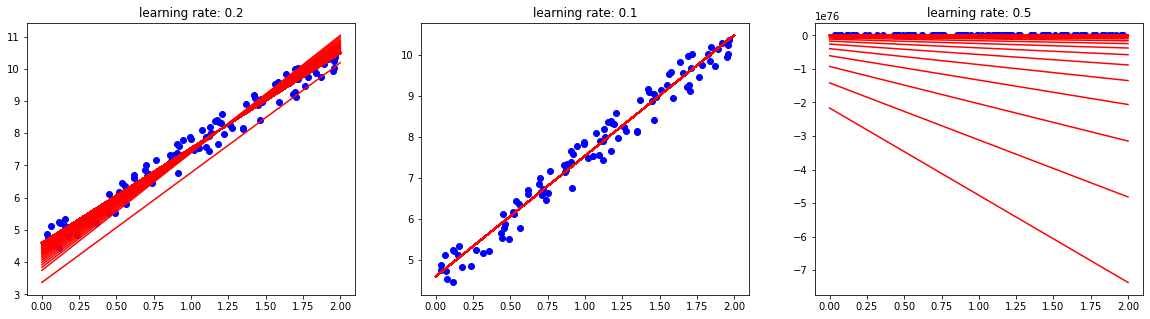

In [18]:
eta = [ 0.2, 0.1 ,0.5]
n_iter = 1000
m = 100

theta = np.random.rand(2,1)
_,ax = plt.subplots(ncols=3,figsize=(20,5))
for cnt,lr in enumerate(eta):
    ax[cnt].set_title('learning rate: ' + str(lr))
    ax[cnt].scatter(X,y,color='b')
    for iter in range(n_iter):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - lr * gradients
        if np.mod(iter,2) == 0:
            ax[cnt].plot([0,2],theta[0] + theta[1]*[0,2],color='red')
            

## Implementation of a Learning Schedule 

## Below, we implement SGD with a learning schedule. Notice that due to the stochastic part, we use a single random sample

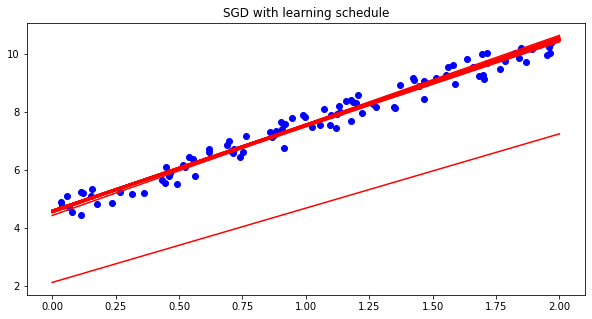

In [21]:
n_epochs = 50
t0, t1 = 5,50 #learning schedule hyper parameters

def learning_schedule(t):
    return t0 / (t + t1)


theta = np.random.randn(2,1)

_,ax = plt.subplots(figsize = (10,5))
ax.scatter(X,y,color = 'blue')
ax.set_title('SGD with learning schedule')
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2* xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch  * m + i)
        theta = theta - eta * gradients
        
        if i == 1:
            ax.plot([0,2],theta[0] + theta[1]*[0,2],'red')

## Implementation of SGD with Learning Schedule

In [24]:
from sklearn.linear_model import SGDRegressor

sk_reg = SGDRegressor(max_iter=1000,tol=1e-3,eta0=0.1,penalty=None)
sk_reg.fit(X,y.ravel())

[sk_reg.intercept_ , sk_reg.coef_]

[array([4.58114612]), array([2.97942907])]

# Polynomial Regression

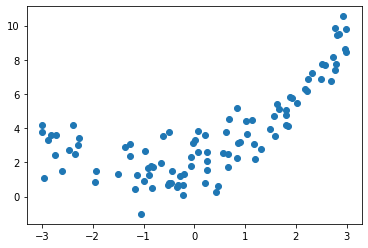

In [25]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1)

plt.scatter(X,y)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias= False)
X_poly = poly_features.fit_transform(X)

print(X[0])
print(X_poly[0])

[-1.96137782]
[-1.96137782  3.84700294]


### polynomial features generates polynomial combinations of the feature input

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)

print(lin_reg.intercept_, lin_reg.coef_)

[1.86567782] [[0.94360672 0.50454716]]


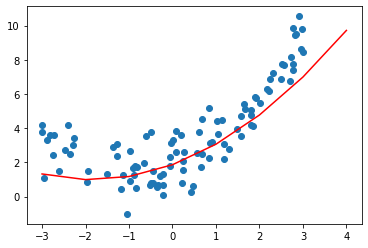

In [37]:
plt.plot(range(-3,5),lin_reg.intercept_ + lin_reg.coef_[:,0]*range(-3,5) + (lin_reg.coef_[:,1]*range(-3,5))**2,color = 'red')
plt.scatter(X,y)

(0.0, 10.0)

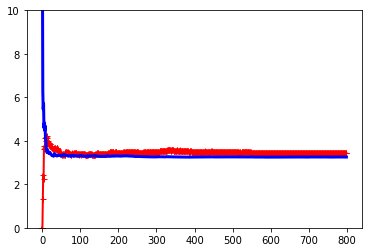

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
    
    train_errors, val_errors = [],[]
    for m  in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_test,y_test_predict))
        
    plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='train')
    plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='validation')
    
    return model
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)
plt.ylim([0,10])

(0.0, 5.0)

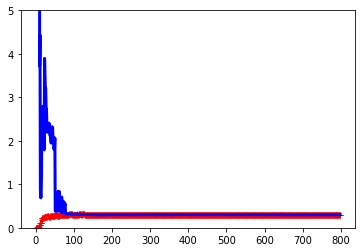

In [65]:
from sklearn.pipeline import Pipeline

poly_pipe = Pipeline([
    ('poly_features',PolynomialFeatures(degree = 10,include_bias = False)),
    ('lin_reg',LinearRegression()),
])

plot_learning_curves(poly_pipe,X,y)
plt.ylim([0,5])

In [66]:
def my_poly_func(polynomial_degree):
    funcy = Pipeline([
        ('poly_features',PolynomialFeatures(degree = polynomial_degree, include_bias = False)),
        ('lin_reg',LinearRegression())
    ])
    
    return funcy

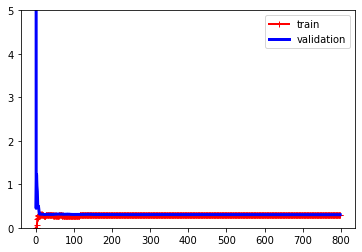

In [67]:
poly_pipe_2 = Pipeline([
    ('poly_features',PolynomialFeatures(degree = 2, include_bias= False)),
    ('lin_reg',LinearRegression()),
])

plot_learning_curves(poly_pipe_2,X,y)
plt.ylim([0,5])
plt.legend()

(0.2, 0.4)

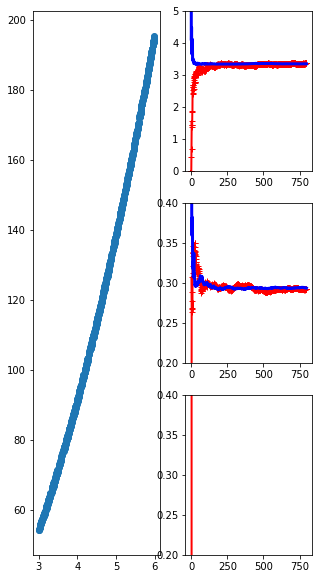

In [72]:
X = 3 * np.random.rand(1000,1) + 3
y = 5 * X ** 2 + 2 * X + 3 + np.random.rand(1000,1)

fig = plt.figure(figsize = (5,10))

plt.subplot(1,2,1); plt.scatter(X,y)

plt.subplot(3,2,2); plot_learning_curves(LinearRegression(),X,y); plt.ylim([0,5])
plt.subplot(3,2,4); plot_learning_curves(my_poly_func(2),X,y); plt.ylim([.2,.4])
plt.subplot(3,2,6); plot_learning_curves(my_poly_func(100),X,y); plt.ylim([.2,.4])

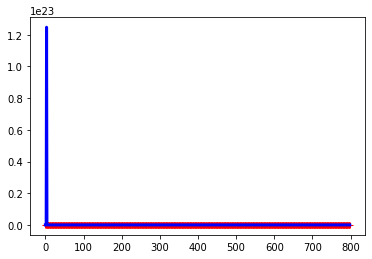

In [74]:
model = plot_learning_curves(my_poly_func(100),X,y)

# Logistic Regression

Training on the iris dataset

In [76]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

X  = iris['data'][:,3:]
y = (iris['target'] == 2).astype(int)

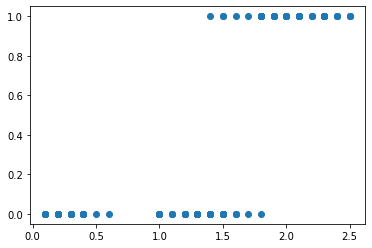

In [79]:
plt.scatter(X,y)

In [80]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

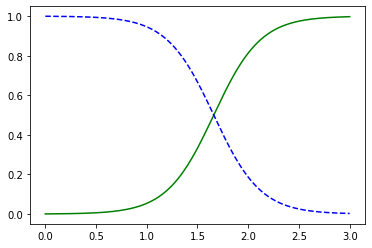

In [81]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],'g-',label = 'Iris virginica')
plt.plot(X_new,y_proba[:,0],'b--',label = 'Not iris viriginca')

In [84]:
print(log_reg.predict([[1.2],[1.8]]))
print(log_reg.predict_proba([[1.2],[1.8]]))

[0 1]
[[0.88027182 0.11972818]
 [0.35323625 0.64676375]]


In [85]:
X = iris['data'][:,(2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [86]:
print(softmax_reg.predict([[5,2]]))
print(softmax_reg.predict_proba([[5,2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]
